In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Perm.csv')

# Первичный анализ данных

In [3]:
df.head()

,Индекс город,Широта,Долгота,Тип стен,Количество комнат,Этаж,Этажность,Общая площадь,Жилая площадь,Площадь кухни,Сезон,Год,Стоимость квартиры,URL
0,2,57.973340,56.265790,6,2,16,17,66.4,30.8,17.5,1,2021,4.071377,https://www.avito.ru/perm/kvartiry/2-k_kvartir...
1,2,57.973340,56.265790,6,3,16,17,65.8,34.3,10.6,1,2021,4.178211,https://www.avito.ru/perm/kvartiry/3-k_kvartir...
2,2,57.964590,56.155070,4,2,18,19,57.6,27.0,12.8,1,2021,4.350000,https://www.avito.ru/perm/kvartiry/2-k._kvarti...
3,2,58.005620,56.321134,4,1,19,25,46.8,19.1,12.4,1,2021,3.200000,https://www.avito.ru/perm/kvartiry/1-k._kvarti...
4,2,58.021646,56.264674,4,1,8,12,40.0,17.0,9.2,1,2021,3.100000,https://www.avito.ru/perm/kvartiry/1-k._kvarti...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Индекс город        2983 non-null   int64  
 1   Широта              2983 non-null   float64
 2   Долгота             2983 non-null   float64
 3   Тип стен            2983 non-null   int64  
 4   Количество комнат   2983 non-null   int64  
 5   Этаж                2983 non-null   int64  
 6   Этажность           2983 non-null   int64  
 7   Общая площадь       2983 non-null   float64
 8   Жилая площадь       2983 non-null   float64
 9   Площадь кухни       2983 non-null   float64
 10  Сезон               2983 non-null   int64  
 11  Год                 2983 non-null   int64  
 12  Стоимость квартиры  2983 non-null   float64
 13  URL                 2983 non-null   object 
dtypes: float64(6), int64(7), object(1)
memory usage: 326.4+ KB


In [5]:
df.nunique()

Индекс город             1
Широта                2063
Долгота               2074
Тип стен                 5
Количество комнат        7
Этаж                    27
Этажность               29
Общая площадь          737
Жилая площадь          530
Площадь кухни          223
Сезон                    1
Год                      1
Стоимость квартиры     810
URL                   2981
dtype: int64

In [6]:
# axis=1 - ось по названию столбцов, inplace - с заменой нашего датафрейма
df.drop(['Индекс город', 'URL'], axis = 1, inplace = True)

<Figure size 6000x4000 with 0 Axes>

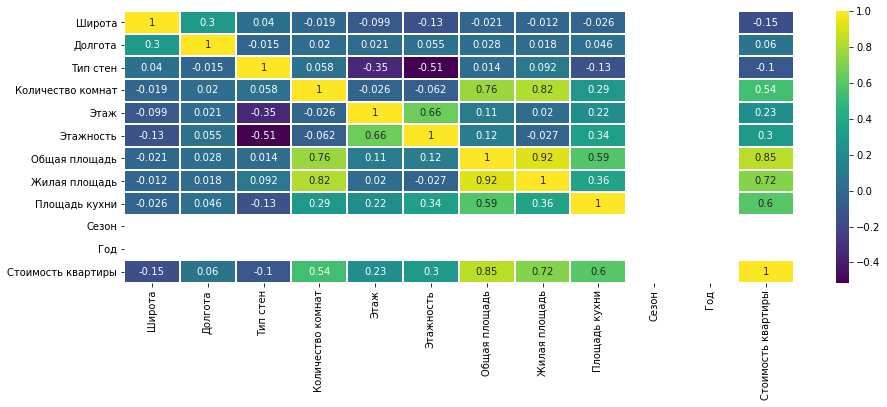

In [7]:
# Корреляционный анализ для всех
# Разрешение изображения
plt.figure(dpi = 1000)
# Размер изображения
plt.figure(figsize = (15, 5))

sns.heatmap(df.corr(), annot = True, lw = 1, linecolor = 'white', cmap = 'viridis')

# Ось ординат повернута на 0 градусов
plt.yticks(rotation = 0)
plt.show()

<Figure size 6000x4000 with 0 Axes>

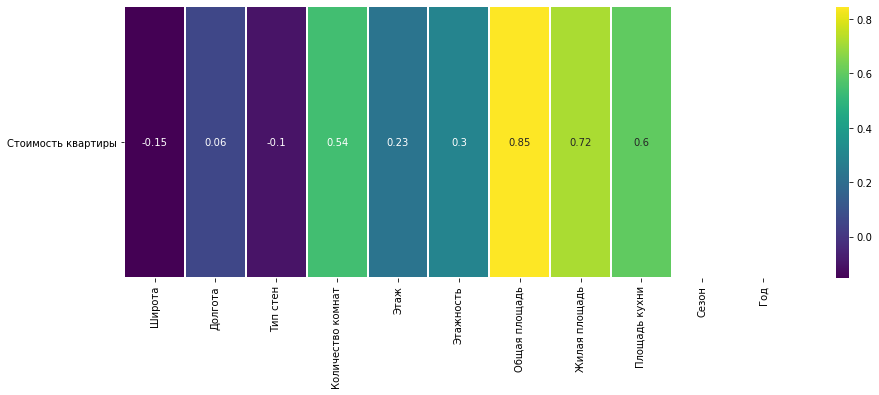

In [8]:
# Корреляционный анализ для стоимости квартиры
# Разрешение изображения
plt.figure(dpi = 1000)
# Размер изображения
plt.figure(figsize = (15, 5))

sns.heatmap(df.corr().iloc[-1:, :-1], annot = True, lw = 1, linecolor = 'white', cmap = 'viridis')

# Ось ординат повернута на 0 градусов
plt.yticks(rotation = 0)
plt.show()

In [9]:
list_values = df.corr().iloc[-1:, :-1].values
dict_corr = {}
index = 0
# Ключ - значение корр., значение - название признака.
for name in list(df.corr().iloc[-1:, :-1]):
    dict_corr[round(list_values[0][index], 3)] = name
    index += 1

In [10]:
list_keys = list(dict_corr.keys())
list_keys.sort()
for i in list_keys:
    print(i, ':', dict_corr[i])

-0.153 : Широта
-0.101 : Тип стен
0.06 : Долгота
0.232 : Этаж
0.298 : Этажность
0.543 : Количество комнат
0.603 : Площадь кухни
0.72 : Жилая площадь
0.846 : Общая площадь
nan : Сезон
nan : Год


In [11]:
df.drop(['Сезон', 'Год'], axis = 1, inplace = True)

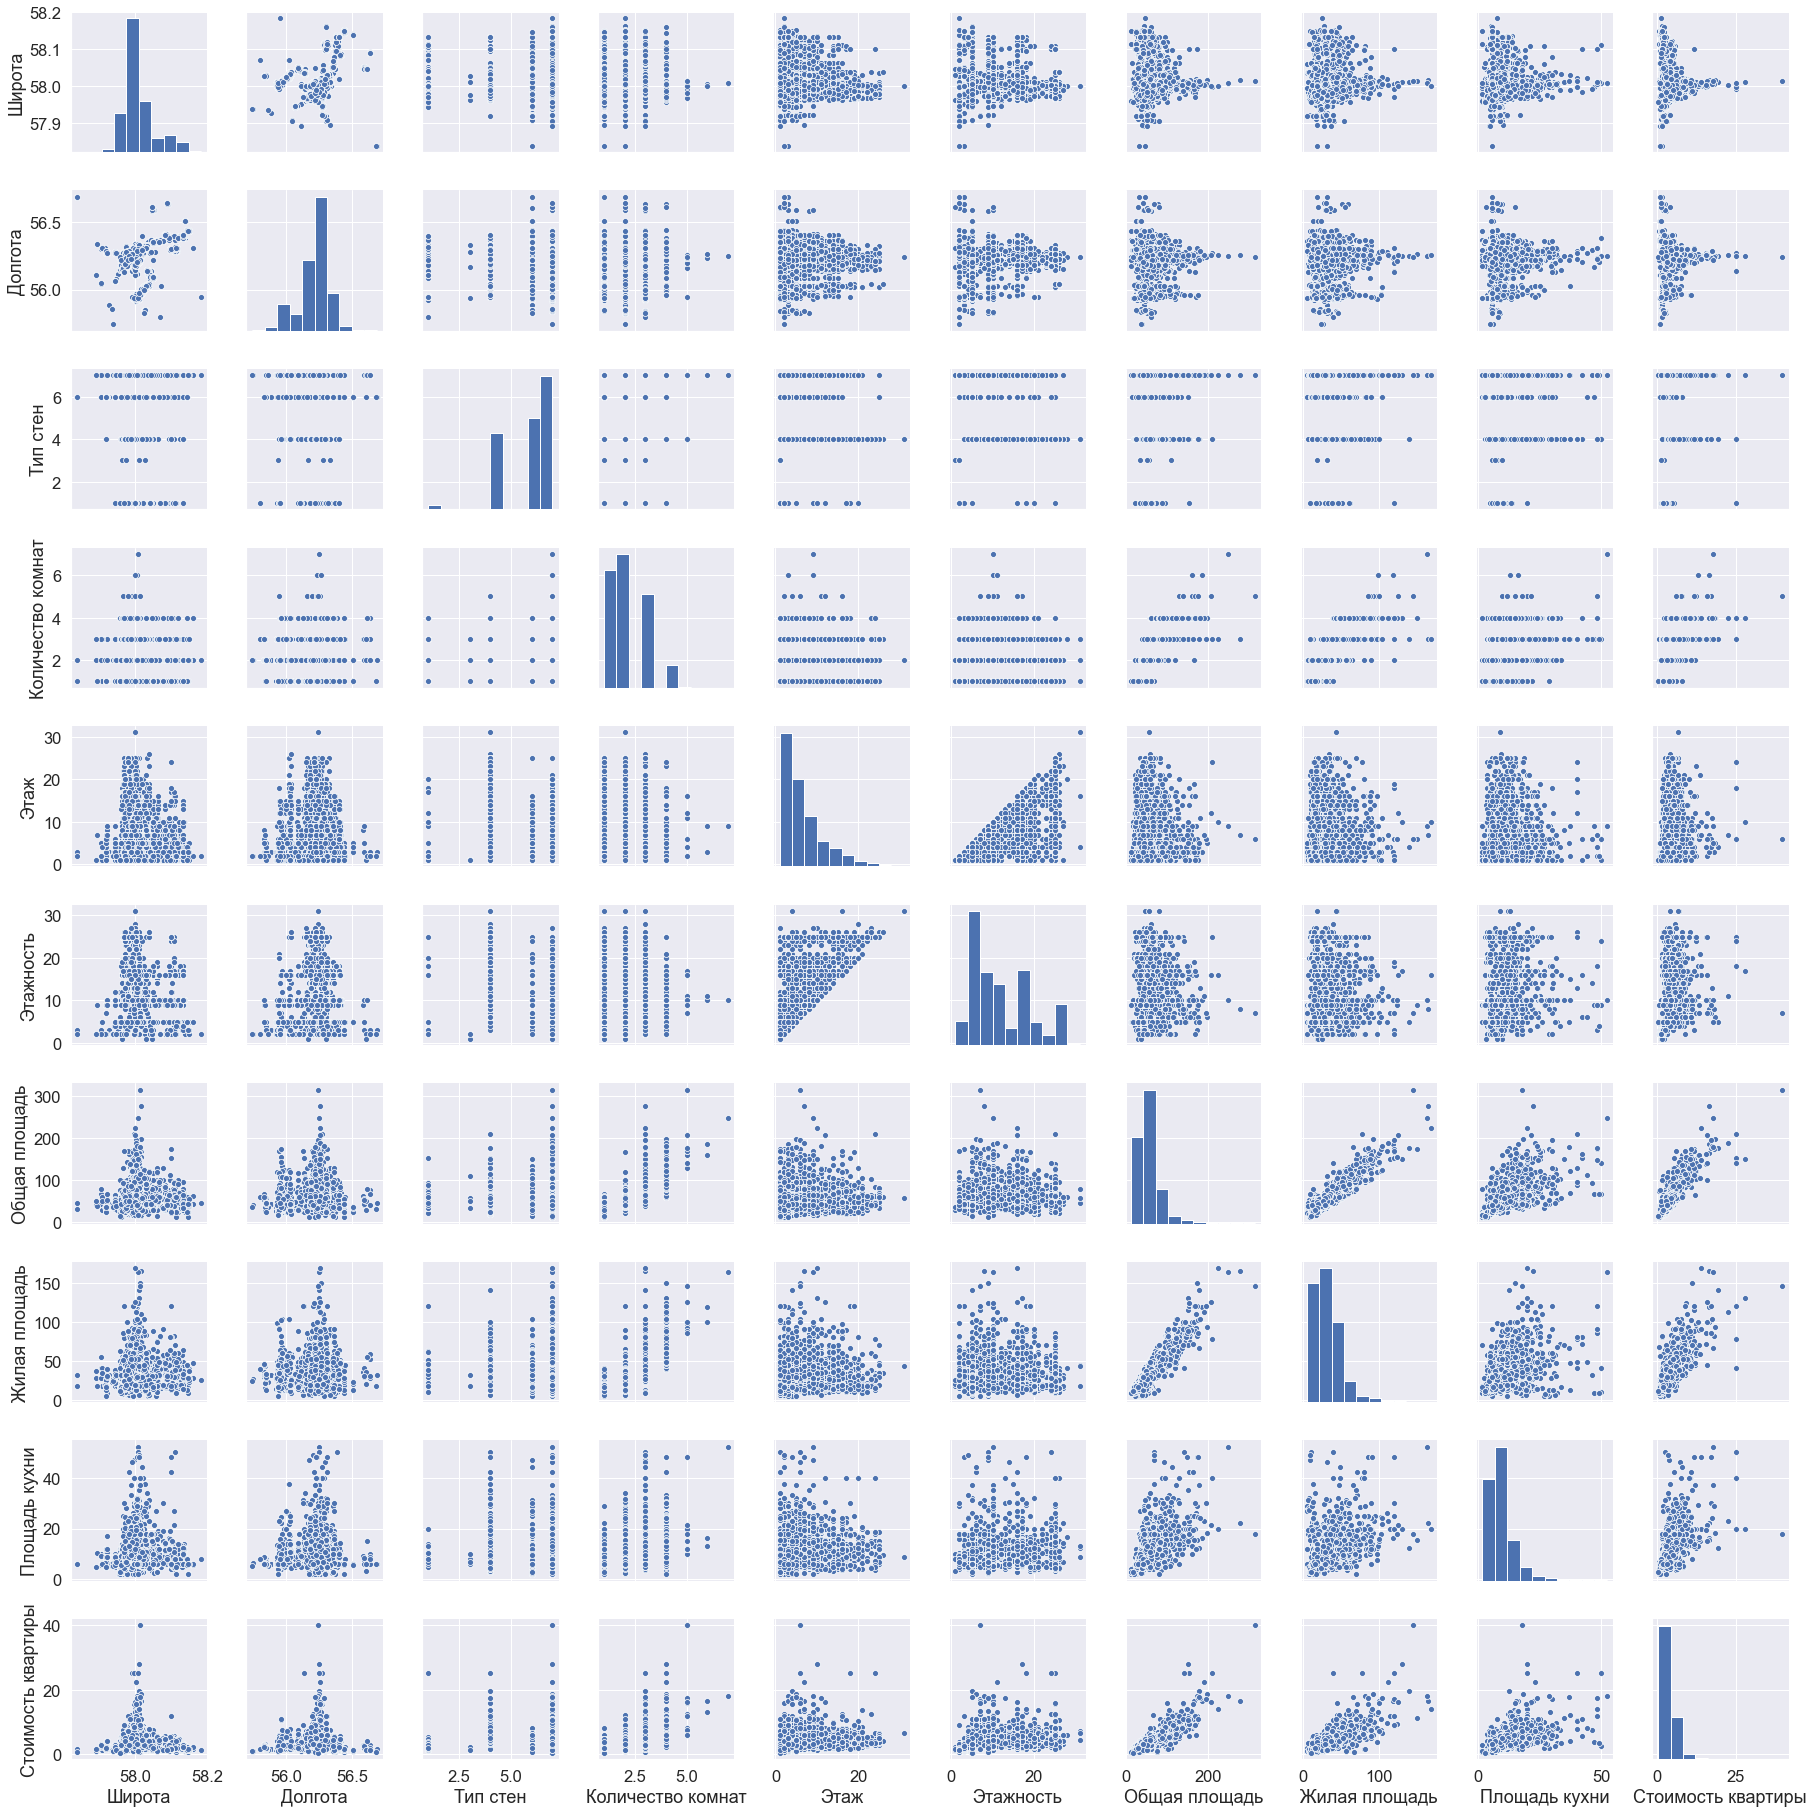

In [12]:
sns.set(font_scale=1.5)
sns.pairplot(df)

# Обработка данных

In [13]:
df.head()

,Широта,Долгота,Тип стен,Количество комнат,Этаж,Этажность,Общая площадь,Жилая площадь,Площадь кухни,Стоимость квартиры
0,57.973340,56.265790,6,2,16,17,66.4,30.8,17.5,4.071377
1,57.973340,56.265790,6,3,16,17,65.8,34.3,10.6,4.178211
2,57.964590,56.155070,4,2,18,19,57.6,27.0,12.8,4.350000
3,58.005620,56.321134,4,1,19,25,46.8,19.1,12.4,3.200000
4,58.021646,56.264674,4,1,8,12,40.0,17.0,9.2,3.100000


In [14]:
name_columns_df = list(df.columns)

def printBoxPlot():
    # Сетка 5х2
    fig, ax = plt.subplots(5,2, figsize=(16, 25))

    index = 0
    for i in range(5):
        for j in range(2):
            sns.boxplot(df[name_columns_df[index]], data = df, ax = ax[i][j])
            index += 1

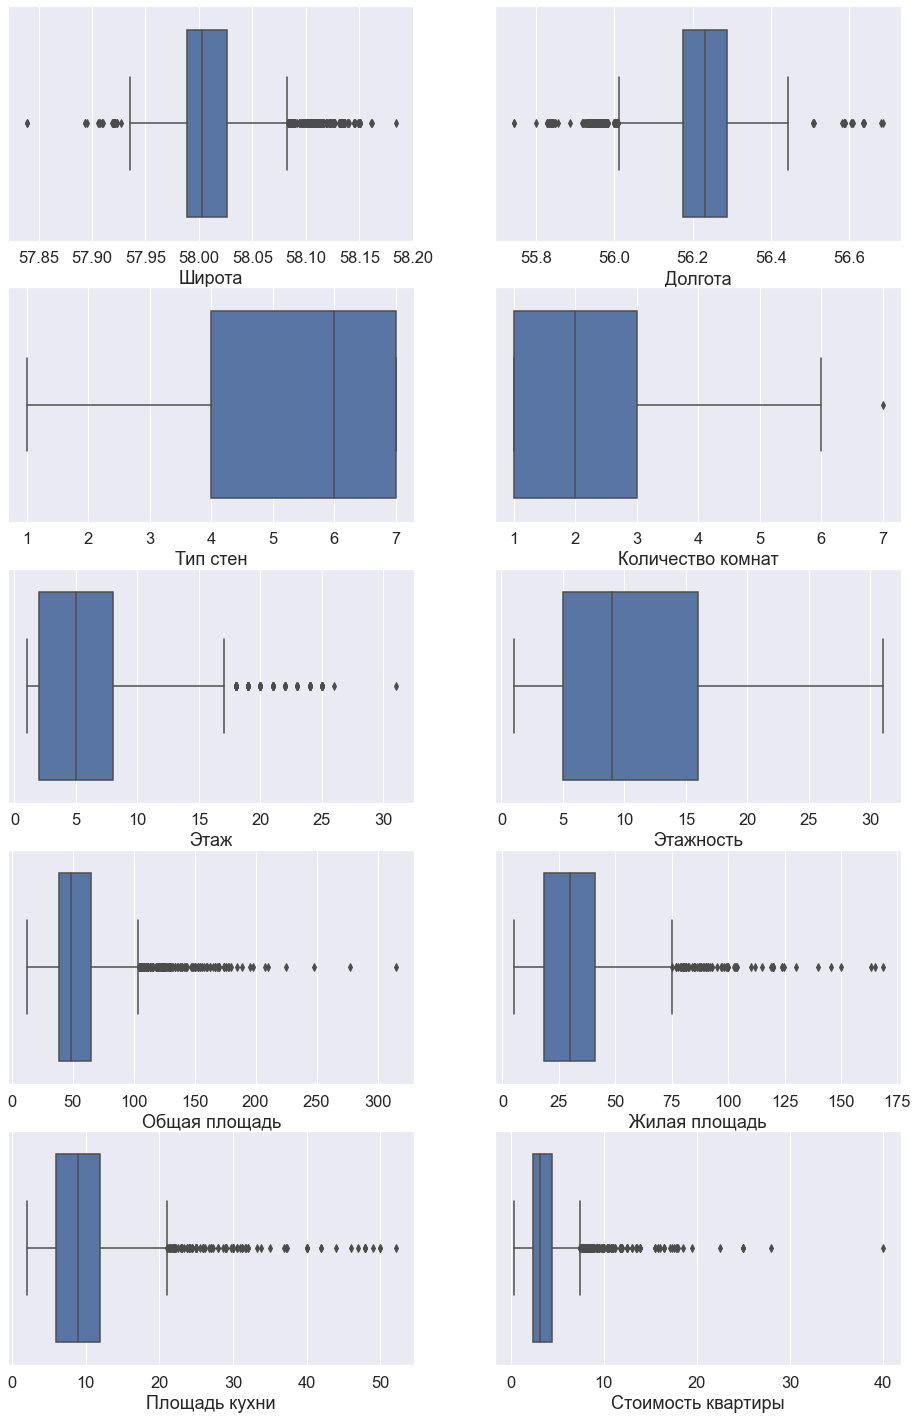

In [15]:
printBoxPlot()

In [16]:
# Interquartile range - межквартильный диапазон, может использоваться для устранения выбросов
# Источник: https://en.wikipedia.org/wiki/Interquartile_range#:~:text=In%20descriptive%20statistics%2C%20the%20interquartile,%3D%20Q3%20%E2%88%92%20Q1.
for name in name_columns_df:
    Q1 = df[name].quantile(0.25)
    Q3 = df[name].quantile(0.75)
    
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Если значение превышает верхнюю или нижнюю границу, 
    # то этому значению присваиваем значение соответствующей границы, 
    # иначе оставляаем такое же значение
    df[name] = np.where(df[name] > upper_limit, upper_limit, df[name])
    df[name] = np.where(df[name] < lower_limit, lower_limit, df[name])

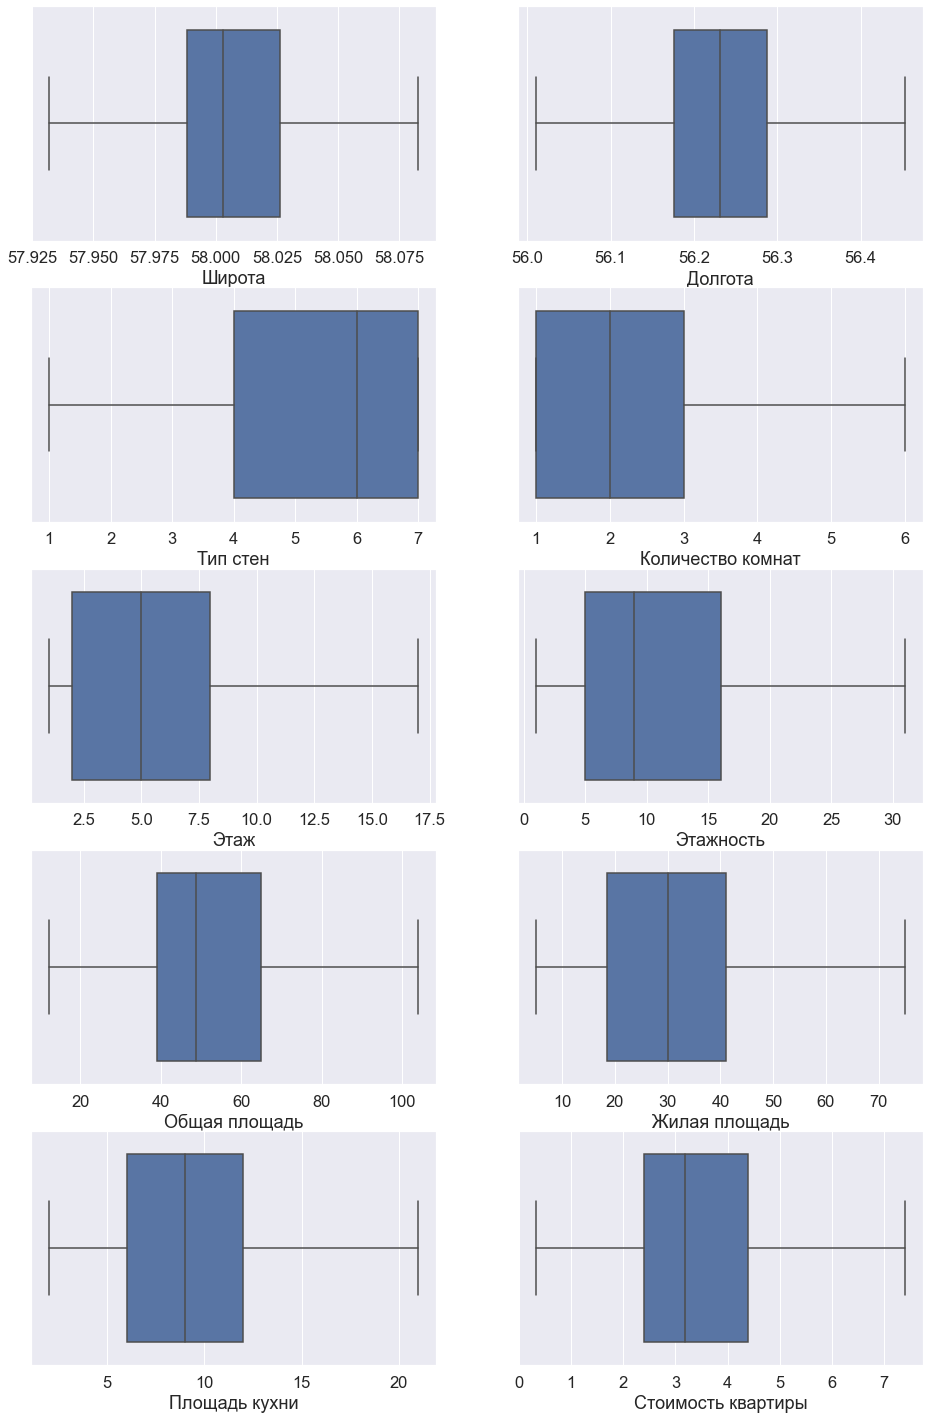

In [17]:
printBoxPlot()

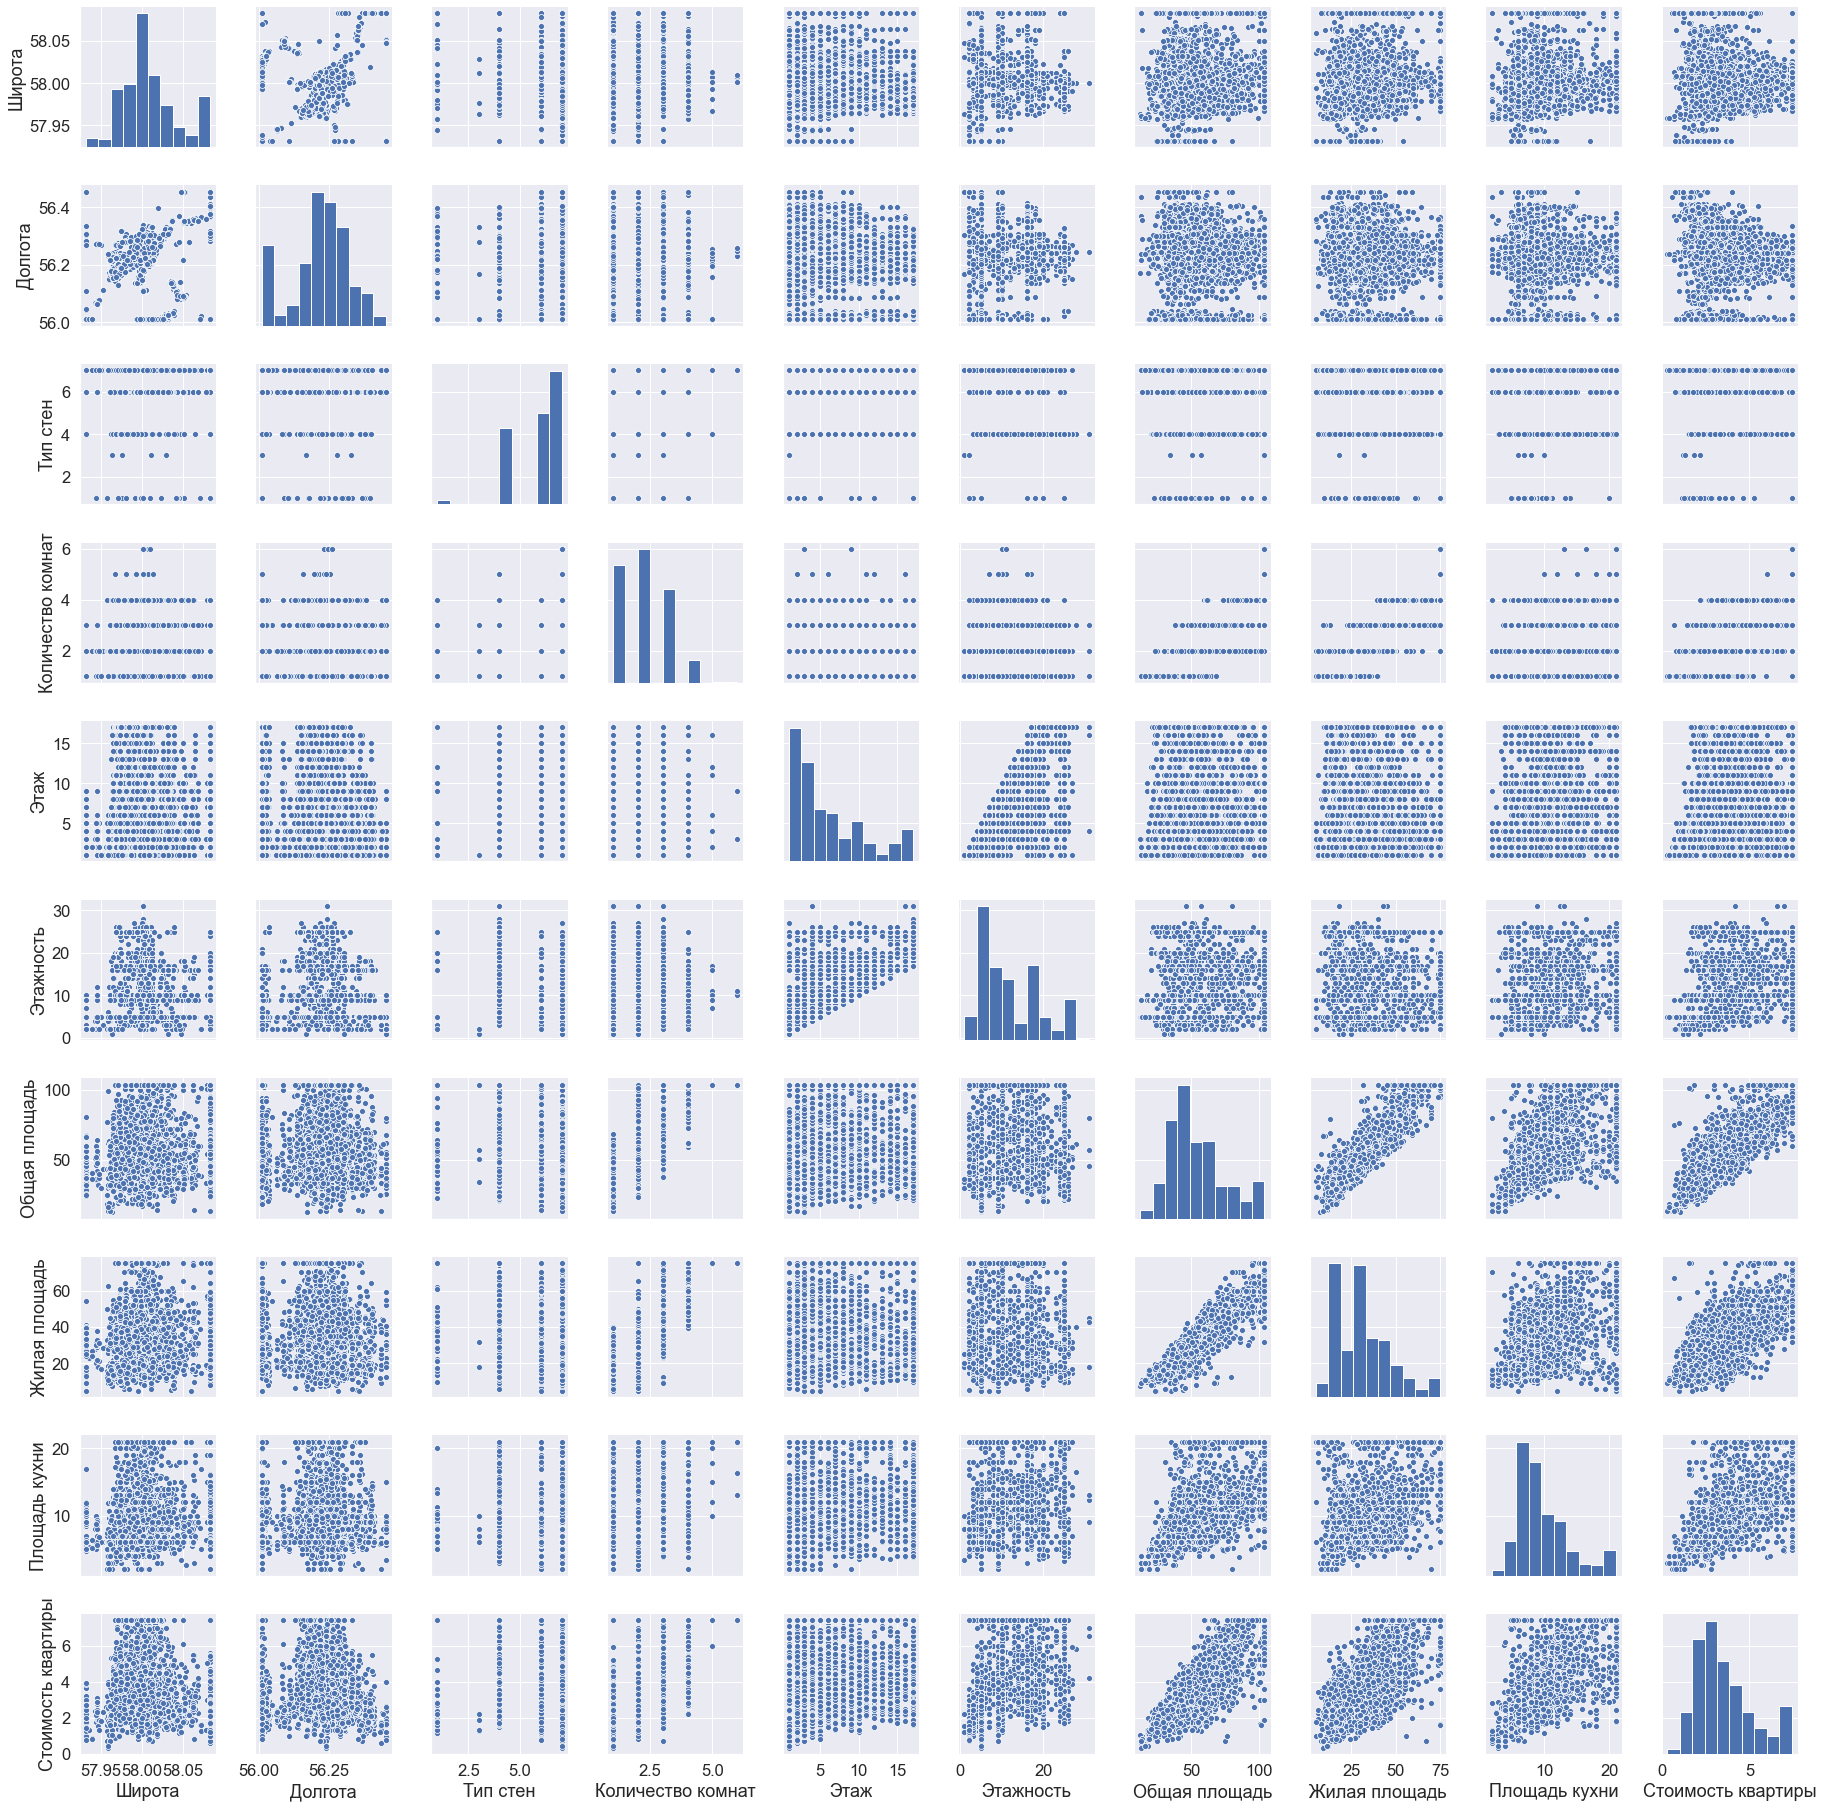

In [18]:
sns.pairplot(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Широта              2983 non-null   float64
 1   Долгота             2983 non-null   float64
 2   Тип стен            2983 non-null   float64
 3   Количество комнат   2983 non-null   float64
 4   Этаж                2983 non-null   float64
 5   Этажность           2983 non-null   float64
 6   Общая площадь       2983 non-null   float64
 7   Жилая площадь       2983 non-null   float64
 8   Площадь кухни       2983 non-null   float64
 9   Стоимость квартиры  2983 non-null   float64
dtypes: float64(10)
memory usage: 233.2 KB


# Разделение данных на обучающий и тестовый наборы с применением масштабирования

In [20]:
# X — пространство объектов
# y — пространство ответов
X = df.drop(['Стоимость квартиры'], axis = 1)
y = df['Стоимость квартиры']

In [21]:
# Применение StandardScaler гарантирует, что
# для каждого признака среднее будет равно 0, а дисперсия будет равна 1,
# в результате чего все признаки будут иметь один и тот же масштаб.
# Формула следующая: сначала находится среднее и стандартное отклонение,
# Потом (из набора - среднее) / стд. отколнение
# Хорошо подходит дял моделей, где нужна регулизация
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

# test_size = 0.3 (30% для тестовго множества, 70% для обучающего)
# random_state - для воспроизведения одних и тех же значений (параметров) 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Алгоритмы машинного обучения с учителем. Задача регрессии. Подбор параметров по сетке

In [23]:
# Линейная регрессия
# a(x) = w + w[1]*x[1] + w[2]*x[2]+...+ w[j]*x[j]    (j=1...d)
# w[p] - веса для признаков x[j], w - свободный коэффициент
# Линейная регрессия находит параметры w[p] и w, которые 
# минимизируют среднеквадратическую ошибку между спрогнозированными и фактическими ответами у в обучающем наборе. 
# Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями. 

# Линейная регрессия проста, что является преимуществом, но в то же 
# время у нее нет инструментов, позволяющих контролировать сложность модели.
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

# Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. 
# Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. 
# Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, 
# то прогнозы сопоставимы по качеству с константным предсказанием.
print("Правильность на обучающем наборе: {:.2f}%".format(lr.score(X_train, y_train) * 100))
print("Правильность на тестовом наборе: {:.2f}%".format(lr.score(X_test, y_test)* 100))


Правильность на обучающем наборе: 81.95%
Правильность на тестовом наборе: 81.23%


In [24]:
# Гребневая регрессия
# Формула аналогична той, что используется в обычном методе наименьших квадратов.
# Но вводится ограниечение на весовые коэфф. w,
# все элементы w должны быть близки к нулю, чтобы каждый признак имел
# как можно меньшее влияние на результат (то есть каждый признак должен иметь небольшой регрессионный коэффициент)
# Это ограничение является примером регуляризации. Регуляризация означает явное ограничение модели для предотвращения переобучения
# Регуляризация, использующаяся в гребневой регрессии, известна как L2 регуляризация

#  С математической точки зрения Ridge штрафует L2 норму коэффициентов или евклидову длину w.
from sklearn.linear_model import Ridge

# Увеличение alpha заставляет коэффициенты сжиматься до близких к нулю значений, 
# что снижает качество работы модели на обучающем наборе, но может улучшить ее обобщающую способность. 
ridge = Ridge(alpha=1).fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train) * 100))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test) * 100))

Правильность на обучающем наборе: 81.95
Правильность на тестовом наборе: 81.22


In [25]:
# GridSearchCV
# Решатчатый поиск с перекрестной проверкой
# Он находит наилучшие параметры, путем обычного перебора: 
# создает модель для каждой возможной комбинации параметров и выбирает лучшую модель
from sklearn.model_selection import GridSearchCV

# Сетка наших параметров
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# CV - перекрестная проверка. cv=5 пятиблочная стратифицированная перекрестная проверка
# Итого 6х5 = 30 моделей
grid_search_Ridge = GridSearchCV(Ridge(), param_grid, cv=5).fit(X_train, y_train)

print("Наилучшие значения параметров: {}".format(grid_search_Ridge.best_params_))

print("\nПравильность на обучающем наборе: {:.2f}%".format(grid_search_Ridge.score(X_train, y_train) * 100))
print("Правильность на тестовом наборе: {:.2f}%".format(grid_search_Ridge.score(X_test, y_test) * 100))

print("\nНаилучшая модель:\n{}".format(grid_search_Ridge.best_estimator_))

Наилучшие значения параметров: {'alpha': 10}

Правильность на обучающем наборе: 81.94%
Правильность на тестовом наборе: 81.17%

Наилучшая модель:
Ridge(alpha=10)


In [26]:
# Лассо
# Как и гребневая регрессия, лассо также сжимает коэффициенты до близких к нулю значений
# Результат L1 регуляризации заключается в том, что при использовании лассо 
# некоторые коэффициенты становятся равны точно нулю. 
# Получается, что некоторые признаки полностью исключаются из модели. 
# Это можно рассматривать как один из видов автоматического отбора признаков.
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
grid_search_Lasso = GridSearchCV(Lasso(max_iter=100000), param_grid, cv=5).fit(X_train, y_train)

print("Наилучшие значения параметров: {}".format(grid_search_Lasso.best_params_))

print("\nПравильность на обучающем наборе: {:.2f}%".format(grid_search_Lasso.score(X_train, y_train) * 100))
print("Правильность на тестовом наборе: {:.2f}%".format(grid_search_Lasso.score(X_test, y_test) * 100))

# Проверим сколько признаков использовано для лучшей модели
print("\nНаилучшая модель:\n{}".format(grid_search_Lasso.best_estimator_))
lasso_best = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Количество использованных признаков: {}".format(np.sum(lasso_best.coef_ != 0)))

# Проверим сколько признаков использовано для различных значений альфа
print("\nМодель с разным параметром альфа:")
for alpha in param_grid['alpha']:
    print("Альфа: {}".format(alpha))
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    print("Правильность на тестовом наборе: {:.2f}%".format(lasso.score(X_test, y_test) * 100))
    print("Количество использованных признаков: {}\n".format(np.sum(lasso.coef_ != 0)))

Наилучшие значения параметров: {'alpha': 0.001}

Правильность на обучающем наборе: 81.95%
Правильность на тестовом наборе: 81.22%

Наилучшая модель:
Lasso(alpha=0.001, max_iter=100000)
Количество использованных признаков: 9

Модель с разным параметром альфа:
Альфа: 0.001
Правильность на тестовом наборе: 81.22%
Количество использованных признаков: 9

Альфа: 0.01
Правильность на тестовом наборе: 81.10%
Количество использованных признаков: 8

Альфа: 0.1
Правильность на тестовом наборе: 79.61%
Количество использованных признаков: 4

Альфа: 1
Правильность на тестовом наборе: 33.44%
Количество использованных признаков: 1

Альфа: 10
Правильность на тестовом наборе: -0.01%
Количество использованных признаков: 0

Альфа: 100
Правильность на тестовом наборе: -0.01%
Количество использованных признаков: 0



In [27]:
# Случайный лес – это набор деревьев решений, где каждое дерево немного отличается от остальных.
# Если мы построим много деревьев, которые хорошо работают и переобучаются с разной степенью, 
# мы можем уменьшить переобучение путем усреднения их результатов.
# Чтобы дать прогноз для случайного леса, алгоритм сначала дает прогноз для каждого дерева в лесе. 
# Потом для регрессии мы можем усреднить эти результаты, чтобы получить наш окончательный прогноз.

# 1. Построить с помощью бутстрапа N случайных подвыборок Xn, n=1..N
# Рандомизация бутстрап заключается в том, что из обучающей выборки длины l выбирают с возвращением l объектов. 
# При этом новая выборка также будет иметь размер l, но некоторые объекты в ней будут повторятся,
# а некоторые объекты из исходной выборки в нее не попадут. 
# Можно показать, что в бутстрапированной выборке будет содержаться в среднем 63% различных объектов исходной выборки.

# 2. Каждая получившаяся подвыборка Xn используется как обучающая выборка для построения 
# соответствующего решающего дерева bn(x).

# 3. Построенные деревья объединяются в композицию: a(x) = 1/N*Sum(n: 1..N)(bn(x))
from sklearn.ensemble import RandomForestRegressor

# n_estimators - кол-во деревьев
# max_features - Число признаков для выбора расщепления; auto (n/3)
# max_depth - макс. глубина, 
# min_samples_leaf -минимальное число образцов в листах
# min_samples_split - минимальное число образцов для сплита (разделения);
# Так же я делал несколько итерраций по параметрам, т.е. для примера:
# сначала выставил кол-во деревьев [10, 20, 50, 100, 150, 200, 500]
# потом нашёл лучшую модель (было при 500) и поставил уже [400, 500, 600, 800]
# далее он нашёл 600, я поставил [550, 600, 650, 700]
param_grid = {'n_estimators': [550, 600, 650, 700],
              'max_depth': [None, 1],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [1, 2, 3]}
# n_jobs=-1 - для параллельной работы (задейственны почти все ядра)
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)

print("Наилучшие значения параметров: {}\n".format(grid_search_rf.best_params_))

print("Правильность на обучающем наборе: {:.2f}%".format(grid_search_rf.score(X_train, y_train) * 100))
print("Правильность на тестовом наборе: {:.2f}%".format(grid_search_rf.score(X_test, y_test) * 100))

print("\nНаилучшая модель:\n{}".format(grid_search_rf.best_estimator_))

Наилучшие значения параметров: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 550}

Правильность на обучающем наборе: 97.83%
Правильность на тестовом наборе: 90.66%

Наилучшая модель:
RandomForestRegressor(min_samples_leaf=2, n_estimators=550)


# Анализ важности признаков

In [28]:
# Отбор признаков – это процесс выбора признаков, имеющих наиболее тесные взаимосвязи с целевой переменной.
# Присутствие в данных неинформативных признаков приводит к снижению точности многих моделей, 
# особенно линейных, таких как линейная и логистическая регрессия.

# Воспользуемся обычной l1 регулизацией в модели lasso
def lasso_l1(alpha):
    lasso_best = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)

    lasso_coef = lasso_best.coef_
    print("Количество использованных признаков: {}".format(np.sum(lasso_coef != 0)))
    print("Коэффициенты: {}".format(lasso_coef))

    # Создаем словрь, где ключ - коэфф, значение - название признака
    name_X = X.columns      
    dict_lasso_coef = {}
    for i in range(len(name_X)):
        # Берем модуль коэфф.
        dict_lasso_coef[abs(lasso_coef[i])] = name_X[i]  

    # Сортируем
    dict_lasso_coef_sorted = {}
    list_keys = list(dict_lasso_coef.keys())
    list_keys.sort(reverse=True)
    for i in list_keys:
        dict_lasso_coef_sorted[i] = dict_lasso_coef[i]

    # Строим горизонтальный бар
    plt.figure(figsize=(20,10))

    names_lasso = list(dict_lasso_coef_sorted.values())
    values_lasso = list(dict_lasso_coef_sorted.keys())

    plt.barh(names_lasso, values_lasso)
    plt.title("Отбор признаков. Lasso l1. Альфа: " + str(alpha))
    plt.xlabel("Значимость признака (Чем больше, тем лучше)")

Количество использованных признаков: 9
Коэффициенты: [-0.28778066  0.1194198  -0.00512132 -0.17245433  0.02861032  0.32621706
  1.18612163  0.13810395  0.2303121 ]


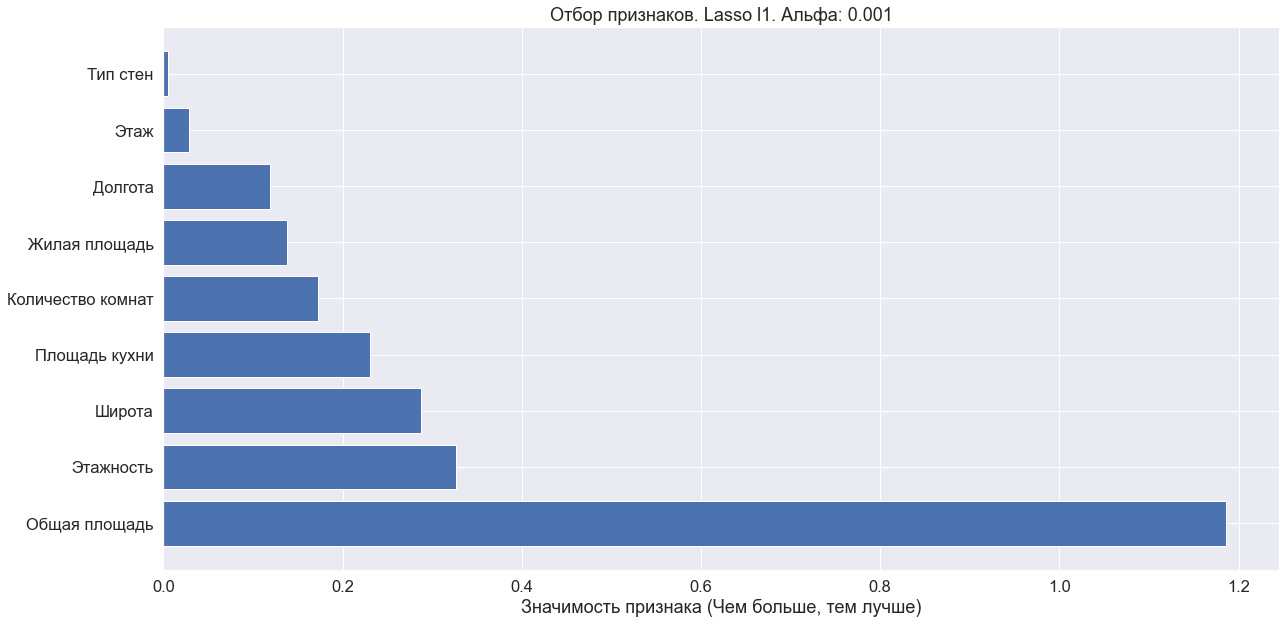

In [29]:
# Возьмем лучшую модель (alpha = 0.001) и посмотрим коэфф.
lasso_l1(0.001)

Количество использованных признаков: 4
Коэффициенты: [-0.15999841  0.         -0.          0.          0.          0.29815659
  1.09251312  0.          0.215851  ]


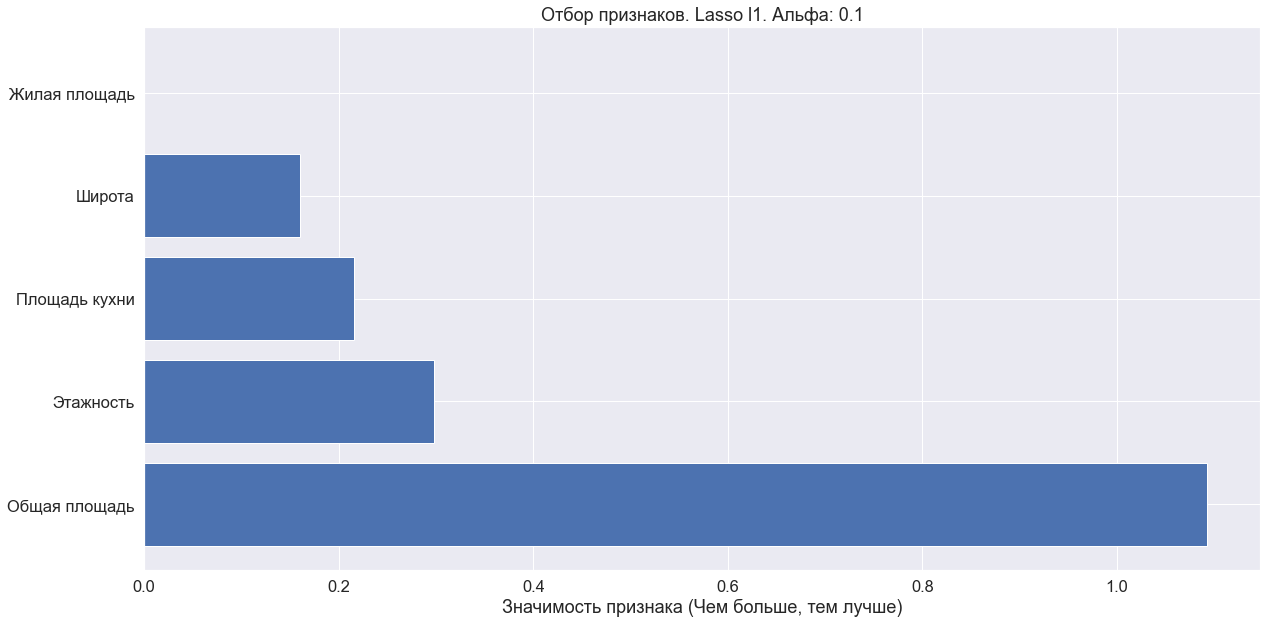

In [30]:
# Т.к. мы использовали словарь, где ключ - это коэфф, а ключ словаря должен быть уникальным
# Широта с площадью кухни поменялись, остальное тоже самое
lasso_l1(0.1)

In [31]:
# Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм: 
# модель обучается на исходном наборе признаков и оценивает их значимость, затем 
# исключается один или несколько наименее значимых признаков, 
# модель обучается на оставшихся признаках, и так далее, 
# пока не останется заданное количество лучших признаков.

# Параметром n_features_to_select задается сколько признаков оставить.
# Команда fit.support_ возвращает список с булевыми значениями оставленных признаков (True). 
# Команда fit.ranking_ возвращает список со значением ранга признака 
# (значение 1 оставленный самый лучший признак)
from sklearn.feature_selection import RFE

def rfeFeature(model):
    rfe = RFE(model, n_features_to_select=1)
    fit_rfe = rfe.fit(X_train, y_train)
    
    rfe_rank = fit_rfe.ranking_
    # Создаем словрь, где ключ - коэфф, значение - название признака
    name_X = X.columns      
    dict_rfe_rank = {}
    for i in range(len(name_X)):
        dict_rfe_rank[rfe_rank[i]] = name_X[i]  

    # Сортируем
    dict_rfe_rank_sorted = {}
    list_keys = list(dict_rfe_rank.keys())
    list_keys.sort()
    for i in list_keys:
        dict_rfe_rank_sorted[i] = dict_rfe_rank[i]

    # Строим горизонтальный бар
    plt.figure(figsize=(20,10))

    names_rfe = list(dict_rfe_rank_sorted.values())
    values_rfe = list(dict_rfe_rank_sorted.keys())

    plt.barh(names_rfe, values_rfe)
    plt.title("Отбор признаков. RFE.")
    plt.xlabel("Значимость признака (Чем больше, тем хуже)")

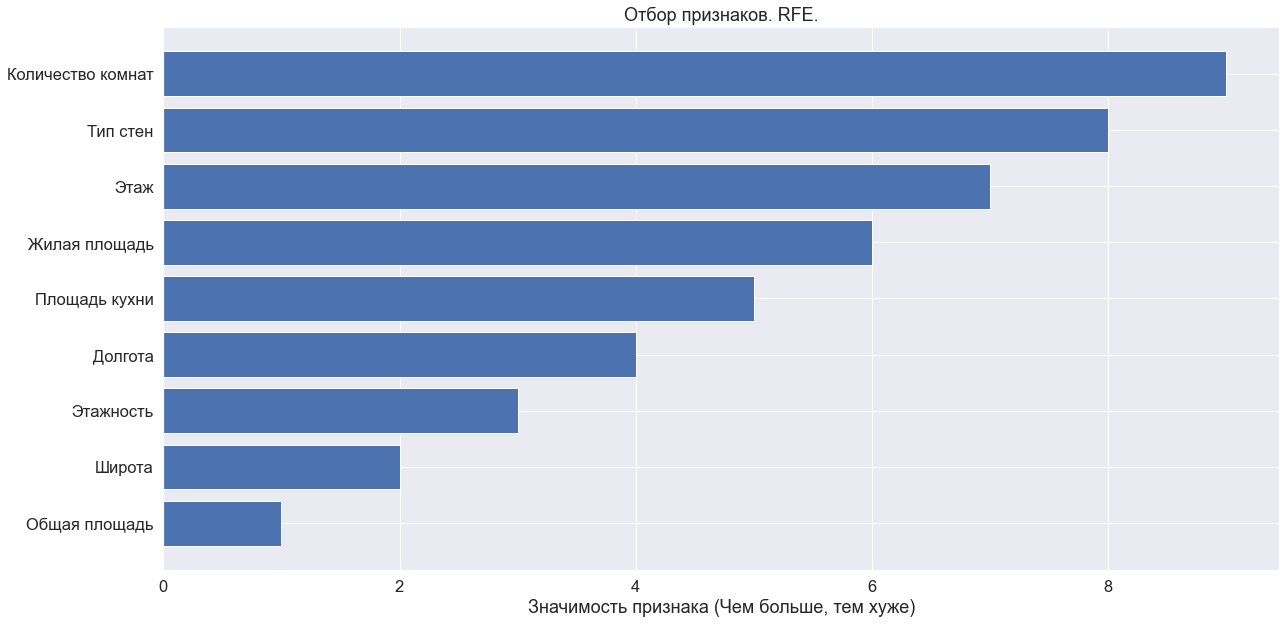

In [32]:
rfeFeature(RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=600))

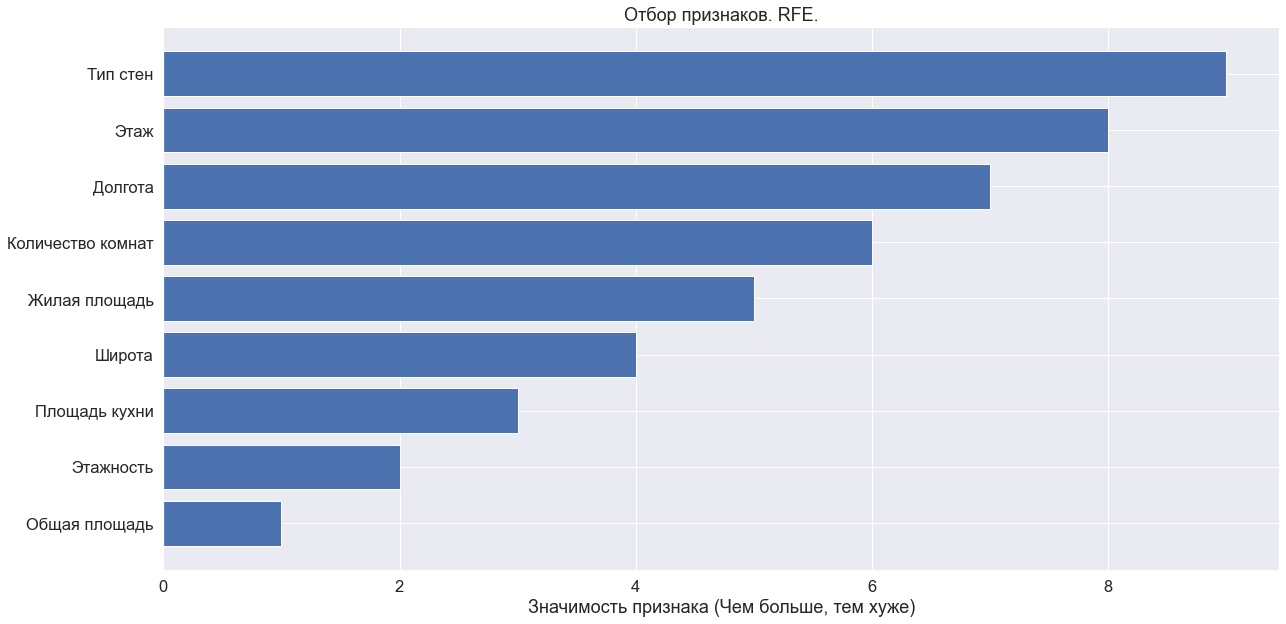

In [33]:
rfeFeature(Ridge(alpha=10))

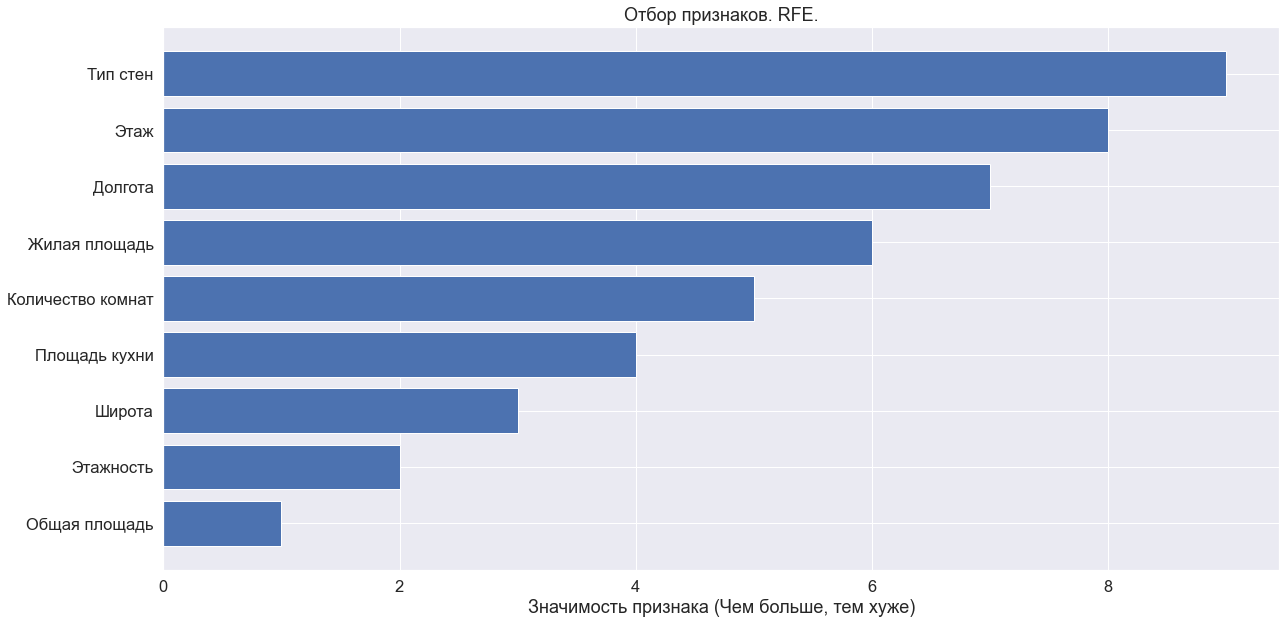

In [34]:
rfeFeature(LinearRegression())

Количество использованных признаков: 9
Коэффициенты: [-0.28778066  0.1194198  -0.00512132 -0.17245433  0.02861032  0.32621706
  1.18612163  0.13810395  0.2303121 ]


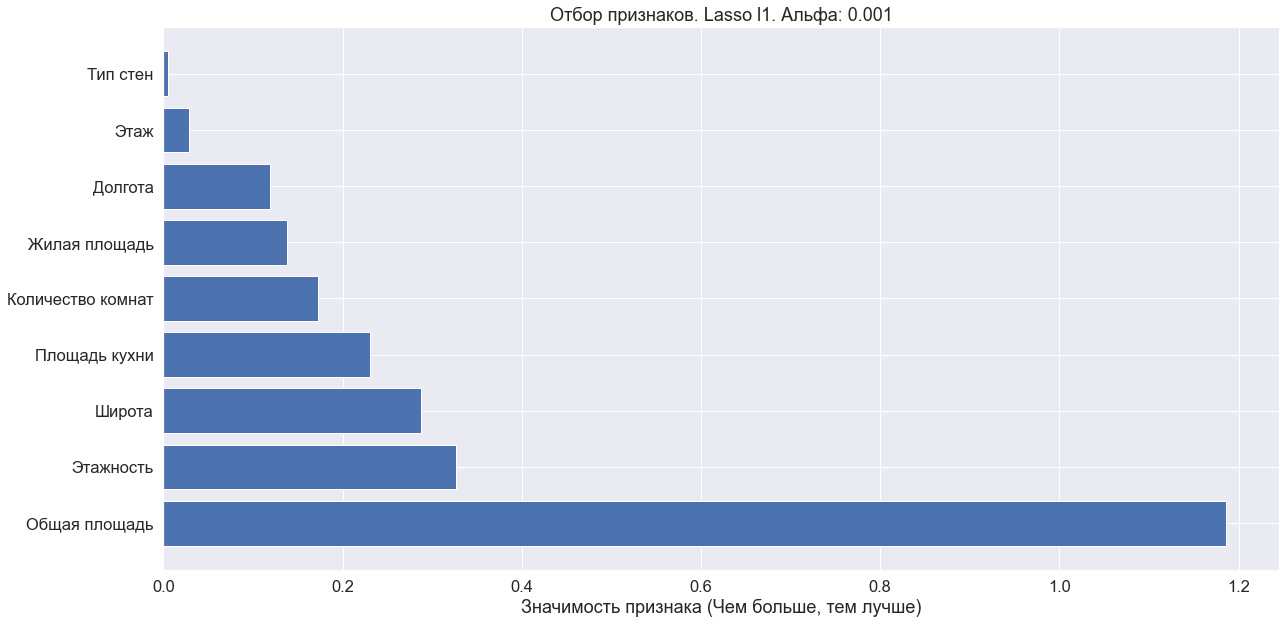

In [35]:
# В сравнении с l1 lasso
lasso_l1(0.001)

# Отбор 4 признаков

In [36]:
# Возьмем Общую площадь, Этажность, Широту, Долготу (Общ. площ и площ. кухни сильно коррелируют межуд собой, поэтому не берем)
X_4f = df.drop(['Стоимость квартиры', 'Тип стен', 'Количество комнат', 'Этаж', 'Жилая площадь', 'Площадь кухни'], axis = 1)
y_4f = df['Стоимость квартиры']

scaler = StandardScaler()
X_4f_scaled = scaler.fit_transform(X)

X_train4f, X_test4f, y_train4f, y_test4f = train_test_split(X_4f_scaled, y_4f, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [37]:
X_4f[:1]

,Широта,Долгота,Этажность,Общая площадь
0,57.97334,56.26579,17.0,66.4


In [38]:
lr_4f = LinearRegression().fit(X_train4f, y_train4f)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_Ridge_4f = GridSearchCV(Ridge(), param_grid, cv=5).fit(X_train4f, y_train4f)
grid_search_Lasso_4f = GridSearchCV(Lasso(max_iter=100000), param_grid, cv=5).fit(X_train4f, y_train4f)

In [39]:
param_grid = {'n_estimators': [100, 400, 600, 700],
              'max_depth': [None, 1, 2, 3],
              'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [1, 2, 3]}

#grid_search_rf_4f = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1).fit(X_train4f, y_train4f)

# Лучшая модель (Чтобы ускорить процесс):
grid_search_rf_4f = RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=600).fit(X_train4f, y_train4f)

#print("\nНаилучшая модель:\n{}".format(grid_search_rf.best_estimator_))

In [40]:
#grid_search_rf_4f.feature_importances_ случайный лес тоже может оценивать важность признаков

In [41]:
models_4f = [lr_4f, grid_search_Ridge_4f, grid_search_Lasso_4f, grid_search_rf_4f]
model_name= ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor"]

for i in range(len(models_4f)):
    print("Модель: " + model_name[i])
    print("Правильность на обучающем наборе: {:.2f}%".format(models_4f[i].score(X_train4f, y_train4f) * 100))
    print("Правильность на тестовом наборе: {:.2f}%\n".format(models_4f[i].score(X_test4f, y_test4f) * 100))

Модель: LinearRegression
Правильность на обучающем наборе: 81.95%
Правильность на тестовом наборе: 81.23%

Модель: Ridge
Правильность на обучающем наборе: 81.94%
Правильность на тестовом наборе: 81.17%

Модель: Lasso
Правильность на обучающем наборе: 81.95%
Правильность на тестовом наборе: 81.22%

Модель: RandomForestRegressor
Правильность на обучающем наборе: 97.80%
Правильность на тестовом наборе: 90.72%



# Итоги. Метрика качества моделей

In [42]:
# Воспользуемся библиотекой metrics из sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
model_name= ["LinearRegression", "Ridge", "Lasso", "RandomForestRegressor"]

# Список моделей, где все признаки и список моделей, где 4 признака
models = [lr, grid_search_Ridge, grid_search_Lasso, grid_search_rf]
models_4f = [lr_4f, grid_search_Ridge_4f, grid_search_Lasso_4f, grid_search_rf_4f]

# Предсказания моделей для обучающ. множества
models_train_predict = []

# Предсказания моделей для тестового множества
models_predict = []
models_4f_predict = []

for i in range(len(models)):
    models_train_predict.append(models[i].predict(X_train))
    models_predict.append(models[i].predict(X_test))
    models_4f_predict.append(models_4f[i].predict(X_test4f))

In [44]:
def plotPairBar(name_metrics, metrics, metrics_4f):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)

    ind = np.arange(len(model_name))
    width = 0.2

    bar1 = ax.bar(ind + width / 2, metrics, width, color='blue')

    bar2 = ax.bar(ind + width * 1.5, metrics_4f, width, color='orange')

    ax.set_xlim(-width,len(ind)+width)
    ax.set_title(name_metrics)

    ax.set_xticks(ind + width)
    xtickNames = ax.set_xticklabels(model_name)
    plt.setp(xtickNames, rotation=0, fontsize=15)

    ax.legend( (bar1[0], bar2[0]), ('Для всех признаков', 'Для 4 признаков') )

    plt.show()

In [45]:
def plotTrainTest(name_metrics, train, test):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(111)

    ind = np.arange(len(model_name))
    width = 0.2

    bar1 = ax.bar(ind + width / 2, train, width, color='blue')

    bar2 = ax.bar(ind + width * 1.5, test, width, color='orange')

    ax.set_xlim(-width,len(ind)+width)
    ax.set_title(name_metrics)

    ax.set_xticks(ind + width)
    xtickNames = ax.set_xticklabels(model_name)
    plt.setp(xtickNames, rotation=0, fontsize=15)

    ax.legend( (bar1[0], bar2[0]), ('Обучающее множество', 'Тестовое множество') )

    plt.show()

[0.47996929614121214, 0.4815516046439135, 0.4800731169557898, 0.23869166131835134]
[0.47996929614121214, 0.4815516046439135, 0.4800731169557898, 0.23726479893534727]


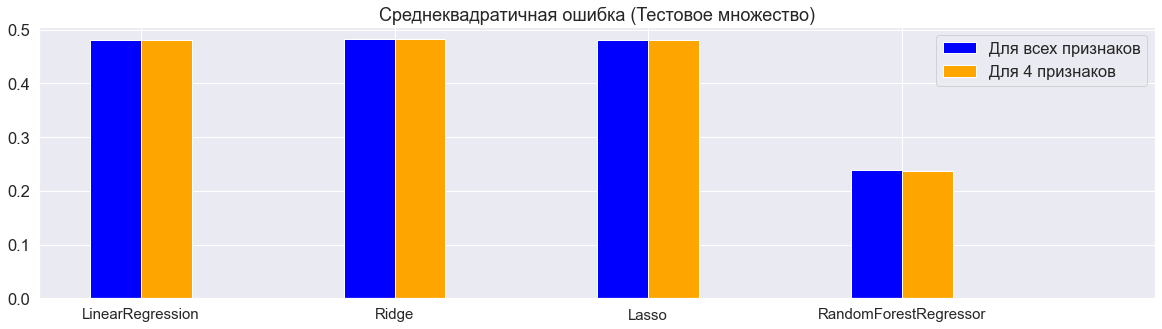

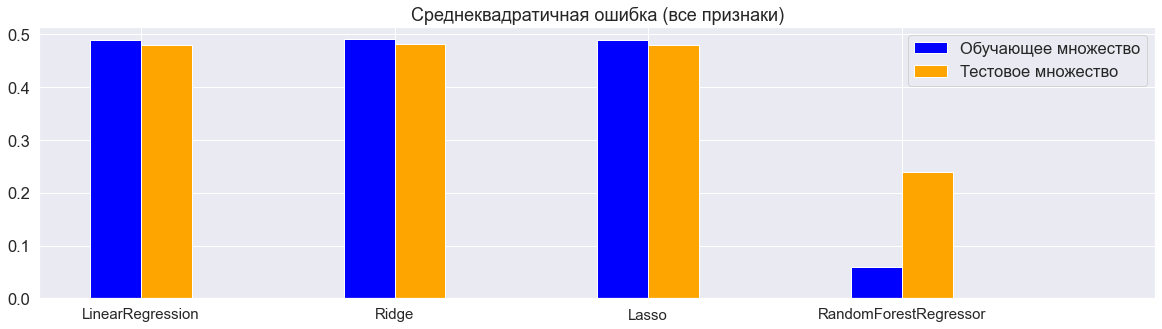

In [46]:
# Среднеквадратичная ошибка
# MSE(a, X) = 1/l Sum(i: 1..l)(a(xi) - yi)^2
# Этот функционал сильно штрафует за большие ошибки, так как отклонения возводятся в квадрат. 
# Это приводит к тому, что штраф на выбросе будет очень сильным, и алгоритм будет настраиваться на выбросы.
# Другими словами, алгоритм будет настраиваться на такие объекты, на которые не имеет смысл настраиваться.

mse_train = []
mse = []
mse_4f = []
for i in range(len(models_predict)):
    mse_train.append(mean_squared_error(y_train, models_train_predict[i]))
    mse.append(mean_squared_error(y_test, models_predict[i]))
    mse_4f.append(mean_squared_error(y_test4f, models_4f_predict[i]))
    
print(mse)
print(mse_4f)

plotPairBar("Среднеквадратичная ошибка (Тестовое множество)", mse, mse_4f)

plotTrainTest("Среднеквадратичная ошибка (все признаки)", mse_train, mse)

[0.510140571839063, 0.5114514624911772, 0.5104045125187147, 0.3430670655737994]
[0.510140571839063, 0.5114514624911772, 0.5104045125187147, 0.3420807595661236]


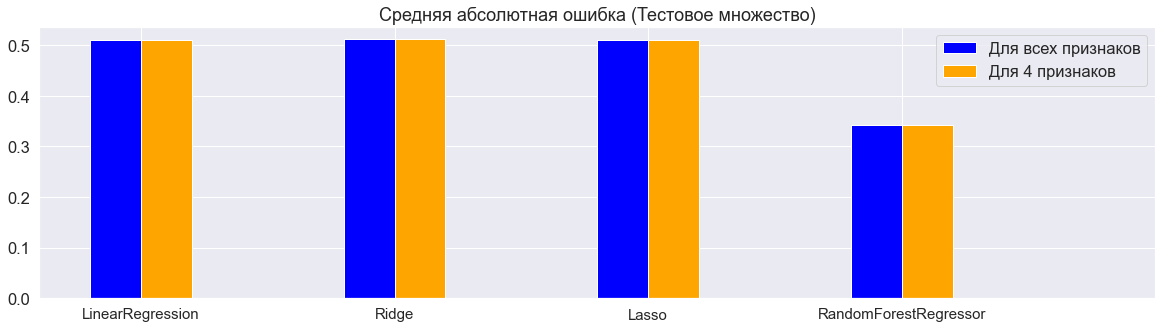

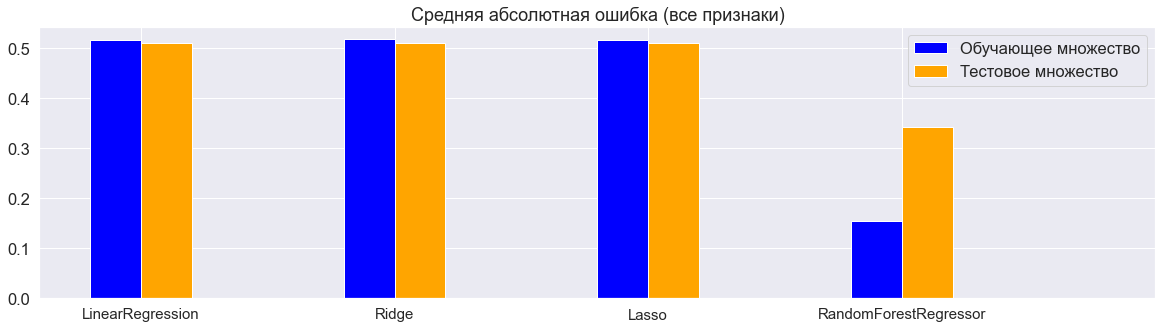

In [47]:
# Средняя абсолютная ошибка
# MAE(a, X) = 1/l Sum(i: 1..l)(|a(xi) - yi|)
# Этот функционал сложнее минимизировать, так как у модуля производная не существует в нуле. 
# Но у такого функционала больше устойчивость к выбросам, так как штраф за сильное отклонение гораздо меньше.

mae_train = []
mae = []
mae_4f = []
for i in range(len(models_predict)):
    mae_train.append(mean_absolute_error(y_train, models_train_predict[i]))
    mae.append(mean_absolute_error(y_test, models_predict[i]))
    mae_4f.append(mean_absolute_error(y_test4f, models_4f_predict[i]))
    
print(mae)
print(mae_4f)

plotPairBar("Средняя абсолютная ошибка (Тестовое множество)", mae, mae_4f)

plotTrainTest("Средняя абсолютная ошибка (все признаки)", mae_train, mae)

[81.23, 81.17, 81.22, 90.66]
[81.23, 81.17, 81.22, 90.72]


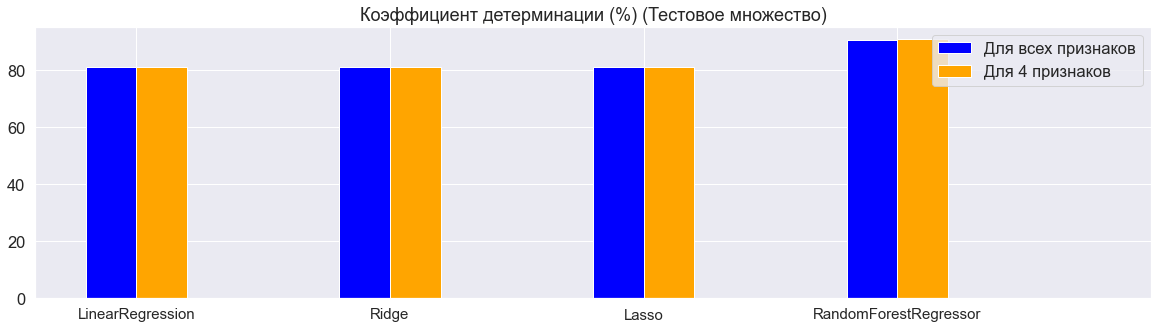

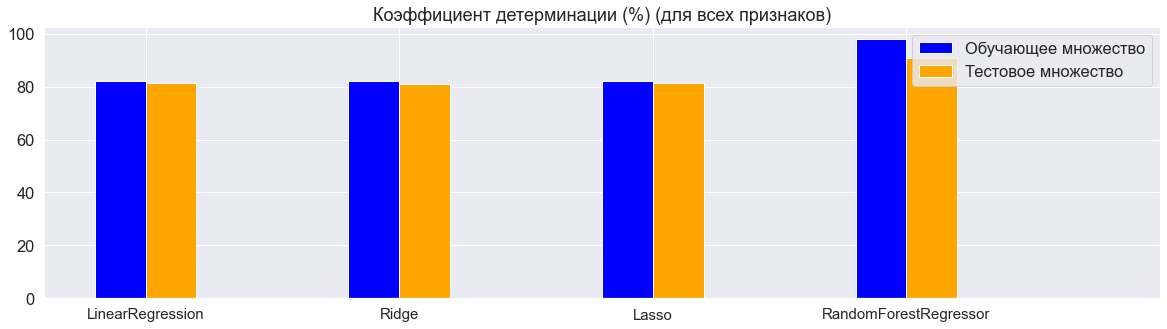

In [48]:
# Коэффициент детерминации R^2 (Который мы уже использовали)
#
# позволяет интерпретировать значение среднеквадратичной ошибки. Этот коэффициент показывает, какую
# долю дисперсии (разнообразия ответов) во всем целевом векторе y модель смогла объяснить.
# Для разумных моделей коэффициент детерминации лежит в пределах от 0 до 1, где 1 - идеальная модель

r2_train = []
r2 = []
r2_4f = []
for i in range(len(models_predict)):
    r2_train.append(round(r2_score(y_train, models_train_predict[i]) * 100, 2))
    r2.append(round(r2_score(y_test, models_predict[i]) * 100, 2))
    r2_4f.append(round(r2_score(y_test4f, models_4f_predict[i]) * 100, 2))
    
print(r2)
print(r2_4f)

plotPairBar("Коэффициент детерминации (%) (Тестовое множество)", r2, r2_4f)

plotTrainTest("Коэффициент детерминации (%) (для всех признаков)", r2_train, r2)